In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

In [2]:
np.random.seed(2343243)

mean_vector_1 = np.array([0,0,0])
covariance_matrix_1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class_1 = np.random.multivariate_normal(mean_vector_1, covariance_matrix_1, 100)

mean_vector_2 = np.array([1,1,1])
covariance_matrix_2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class_2 = np.random.multivariate_normal(mean_vector_2, covariance_matrix_2, 100)

data = np.concatenate((class_1, class_2))

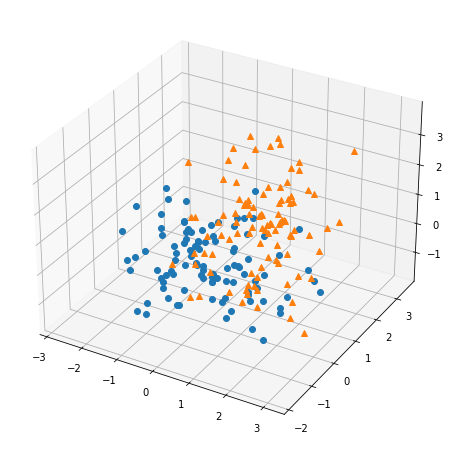

In [3]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(class_1[:, 0], class_1[:, 1], class_1[:, 2], 'o')
ax.plot(class_2[:, 0], class_2[:, 1], class_2[:, 2], '^')
plt.show()

In [4]:
class PCA:
    '''This class implements the Principal Component Analysis algorithm.'''
    def __init__(self, n_components = None):
        self.n_components = n_components
    
    def fit(self, X):
        #finding the covariance matrix
        covariance = np.cov(X, rowvar = False)
        
        #finding the eigen values and eigen vectors for the covariance matrix obtained above
        eigen_values, eigen_vectors = np.linalg.eig(covariance)
        
        eigen_value_vector_pairs = []
        for i in range(len(eigen_values)):
            eigen_value_vector_pairs.append([eigen_values[i], eigen_vectors[:, i]])
            
        eigen_value_vector_pairs.sort(reverse = True)
        
        if(not self.n_components):
            self.n_components = len(eigen_values)
        
        self.explained_variance_ = np.array([])
        self.components_ = np.array([])
        for i in range(self.n_components):
            self.explained_variance_ = np.append(self.explained_variance_, eigen_value_vector_pairs[i][0])
            self.components_ = np.append(self.components_, eigen_value_vector_pairs[i][1])
        self.components_ = self.components_.reshape(self.n_components, X.shape[1])

In [5]:
pca = PCA(n_components = 2)
pca.fit(data)

In [6]:
print('Components:')
print(pca.components_)
print('\nExplained Variance:')
print(pca.explained_variance_)

Components:
[[ 0.41124564  0.64810013  0.64097055]
 [ 0.91063567 -0.26106644 -0.32029202]]

Explained Variance:
[1.45186534 1.07866114]
